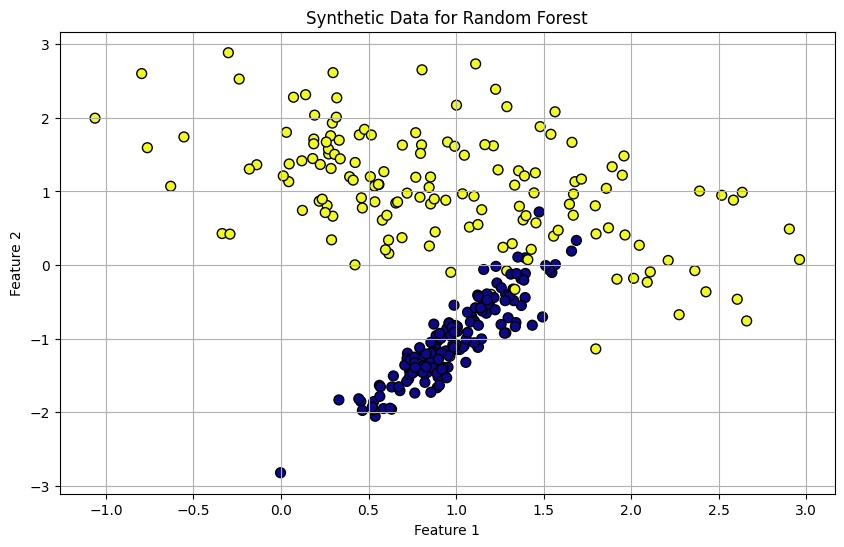

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# --- 1a: Generate a complex classification dataset ---
# n_features=2: We'll stick to 2D for easy visualization
# n_redundant=0: No features are simple combinations of others
# n_informative=2: Both features are useful for classification
# n_clusters_per_class=1: Each class will be a single "blob"
# n_samples=300: A larger dataset
# random_state: For reproducibility
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_samples=300, random_state=42)

# --- 1b: Visualize the Data ---
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='plasma', edgecolor='k')

plt.title('Synthetic Data for Random Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- 2a: Create an instance of the Random Forest model ---
# We'll create a forest of 100 trees.
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

# --- 2b: Train the model ---
# The .fit() method will build all 100 decision trees, each on a
# different random sample of the data and features.
print("--- Training the Random Forest model ---")
model.fit(X, y)
print("--- Training Complete ---")


# --- 2c: Evaluate the model on the training data ---
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"\nThe accuracy of our Random Forest model is: {accuracy * 100:.2f}%")

--- Training the Random Forest model ---
--- Training Complete ---

The accuracy of our Random Forest model is: 98.00%


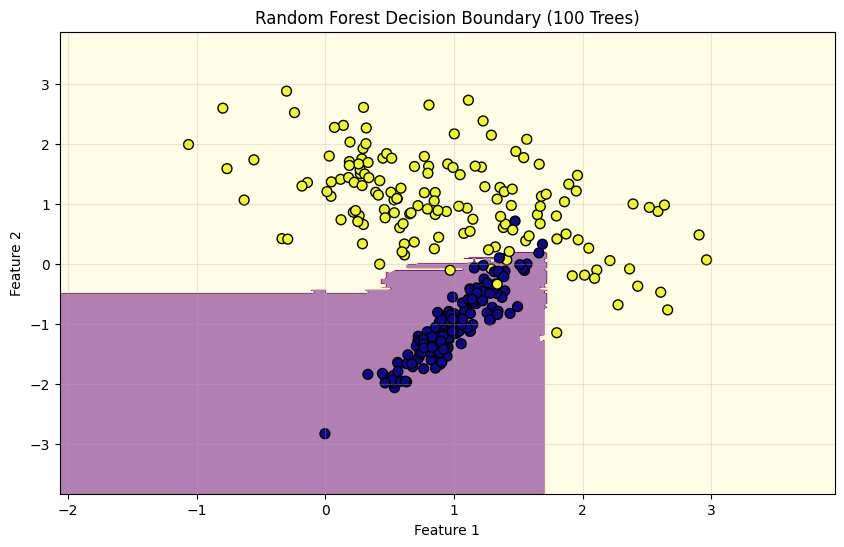

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y):
    """
    A generic helper function to plot the decision boundary for a classifier.
    """
    plt.figure(figsize=(10, 6))
    
    # Create a color map to match the data plot
    cmap_background = ListedColormap(['#660066', '#FFFACD']) # Dark Purple, LemonChiffon
    
    # 1. Create a grid to evaluate the model
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 2. Make predictions on every point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 3. Plot the decision regions
    plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.5)

    # 4. Plot the original training points on top
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma', edgecolor='k', s=50)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Random Forest Decision Boundary (100 Trees)")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True, alpha=0.3)
    plt.show()

# --- Call the function for our trained Random Forest model ---
plot_decision_boundary(model, X, y)